<a href="https://colab.research.google.com/github/AyaTaha16/Generative_AI_DEPI/blob/main/MNIST_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.util import random_noise
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Print the dataset
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


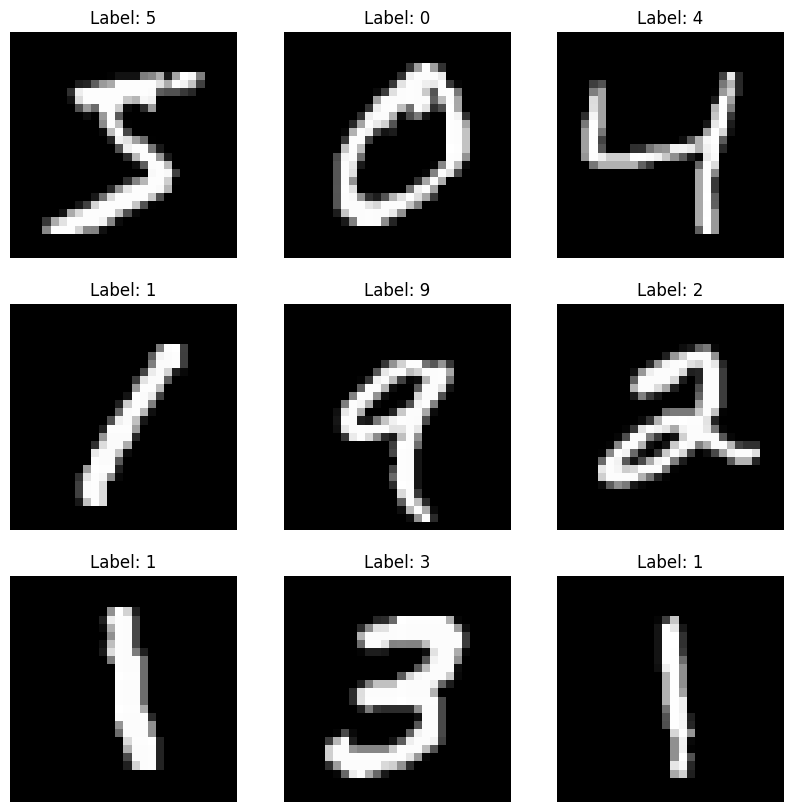

In [ ]:
# Print some sample images and their labels
# Display the first 9 images of the training set
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
# Apply noise to the training and test images
X_train_noisy = [random_noise(image, mode='gaussian', var=0.1) for image in X_train]
X_test_noisy = [random_noise(image, mode='gaussian', var=0.1) for image in X_test]

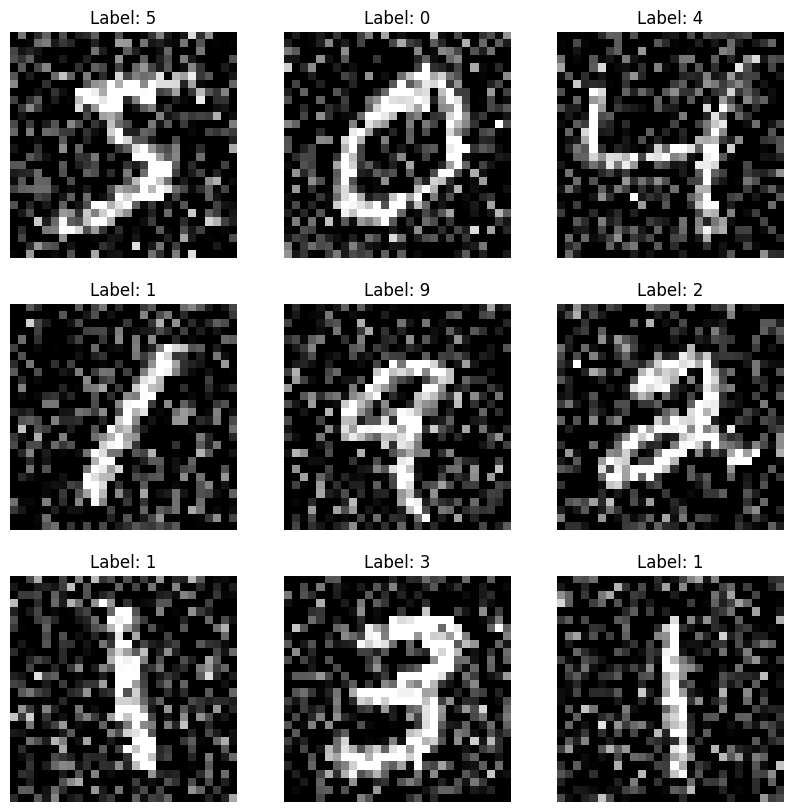

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_noisy[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1) # Use X_train.shape[0] to get number of samples
X_test_flat = X_test.reshape(X_test.shape[0], -1)
# Normalize the data
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

In [ ]:
model = Sequential()
# Encoder
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# Decoder
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mse')
# Train the autoencoder
model.fit(X_train_flat, X_train_flat, epochs=10, batch_size=32, validation_data=(X_test_flat, X_test_flat))

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.0314 - val_loss: 0.0196
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0174 - val_loss: 0.0153
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0148 - val_loss: 0.0136
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0134 - val_loss: 0.0130
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0126 - val_loss: 0.0122
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0121 - val_loss: 0.0115
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0109 - val_loss: 0.0107
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

313/313 [==============================] - 1s 4ms/step - loss: 0.0105
Test loss: 0.0105
1/1 [==============================] - 0s 26ms/step


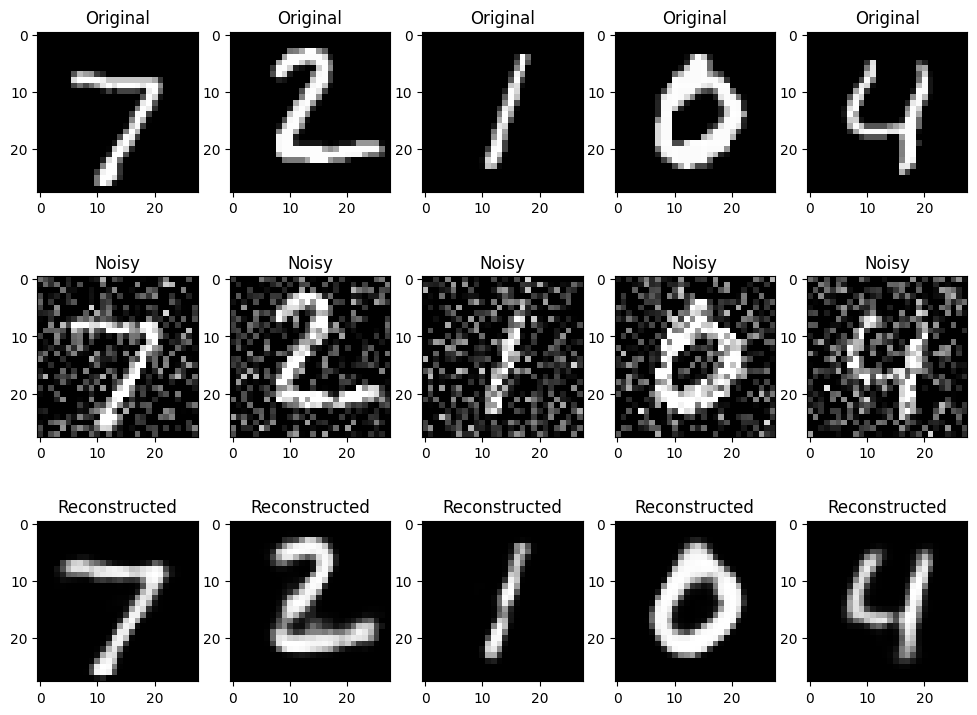

In [ ]:
# Evaluate the autoencoder
loss = model.evaluate(X_test_flat, X_test_flat)
print(f'Test loss: {loss:.4f}')

# Encode and decode some test samples
encoded_samples = model.predict(X_test_flat[:5])
decoded_samples = model.predict(encoded_samples)

# Reshape the decoded samples back to 28x28 images
decoded_images = [img.reshape(28, 28) for img in decoded_samples]



# Display the original, noisy, and reconstructed images
fig, ax = plt.subplots(3, 5, figsize=(12, 9))
for i in range(5):
    ax[0, i].imshow(X_test[i], cmap='gray')
    ax[0, i].set_title('Original')
    ax[1, i].imshow(X_test_noisy[i].reshape(28, 28), cmap='gray')
    ax[1, i].set_title('Noisy')
    ax[2, i].imshow(decoded_images[i], cmap='gray')
    ax[2, i].set_title('Reconstructed')
plt.show()